In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# 텐서 기본 연산
# 행렬

t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t.shape

TensorShape([2, 3])

In [3]:
t.dtype

tf.float32

In [4]:
# 스칼라

tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [5]:
# 인덱싱

t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [7]:
# 연산

t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.add(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
# 제곱

tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
# 행렬 곱

t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

대부분 넘파이에 있는 연산과 이름이 같다.

하지만 reduce_mean() = mean(), reduce_sum() = sum(), reduce_max() = max(), math.log() = log() 등과 같이 조금 다른 것들도 있다.

특히 transpose()의 경우 넘파이에서는 t.T로 사용하는데 이는 동일한 데이터의 단순히 전치된 뷰를 의미하지만 텐서플로에서는 전치된 데이터의 복사본으로 새로운 텐서가 만들어지기 때문이다.

In [11]:
# 케라스의 저수준 API

K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

In [12]:
# 텐서와 넘파이

a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [13]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [15]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [16]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

텐서플로에서는 타입이 다른연산은 실행되지 않는다.

왜냐하면 타입이 중간에 자동으로 바뀌게 된다면 사용자가 눈치채지 못할 수 있기 때문이다.

In [17]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 


In [18]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 


In [19]:
# 타입변환

t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [20]:
# 바이트 처리

tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [21]:
# 유니코드 처리

tf.constant(u"카페")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xec\xb9\xb4\xed\x8e\x98'>

In [22]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [23]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [24]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [25]:
# 문자열 배열

p = tf.constant(["Café", "Coffee", "caffè", "카페"])
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [26]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [52852, 54168]]>

In [27]:
# 리스트의 리스트

print(r[1])
print(r[1:3])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)
<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [28]:
# 리스트 병합

r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [52852, 54168], [65, 66], [], [67]]>


In [29]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [52852, 54168, 72, 73]]>


In [30]:
tensor1 = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
tensor2 = tf.constant([[[9, 10], [11, 12]], [[13, 14], [15, 16]]])

result = tf.concat([tensor1, tensor2], axis=2)

print(tensor1, tensor2, result)

tf.Tensor(
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]], shape=(2, 2, 2), dtype=int32) tf.Tensor(
[[[ 9 10]
  [11 12]]

 [[13 14]
  [15 16]]], shape=(2, 2, 2), dtype=int32) tf.Tensor(
[[[ 1  2  9 10]
  [ 3  4 11 12]]

 [[ 5  6 13 14]
  [ 7  8 15 16]]], shape=(2, 2, 4), dtype=int32)


In [31]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [32]:
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [52852, 54168]]>

In [33]:
# 텐서로 변환

r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [52852, 54168,     0,     0,     0,     0]])>

In [34]:
# 희소 텐서
# (3,4)의 배열에 [0, 1], [1, 0], [2, 3]의 좌표에 각각 1., 2., 3.값이 존재

s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [35]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [36]:
s2 = s * 2.0
tf.sparse.to_dense(s2)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 0., 0.],
       [4., 0., 0., 0.],
       [0., 0., 0., 6.]], dtype=float32)>

In [37]:
# SparseTensor에는 float와 더하기 연산 안된다.

try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [38]:
# 희소 행렬과 곱연산 - 메모리 및 성능 좋음

s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [39]:
# SparseTensor의 indices는 정렬되어야 함

s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [40]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense] name: 


In [41]:
# SparseTensor의 indices를 정렬하여 오류 수정

s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [42]:
# 집합(희소 텐서로 표현)

set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [43]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [44]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

In [45]:
# 변수 - 값이 바뀜

v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v.assign(2 * v)
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>


In [46]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [47]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [48]:
# assign을 사용하지 않으면 안된다

try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [49]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [50]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

In [51]:
# 텐서 배열

array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [52]:
# 인덱스의 텐서를 추출함

array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [53]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [54]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [55]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

In [56]:
# 사용자 정의 손실 함수로 켈리포니아 주택 데이터학습

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

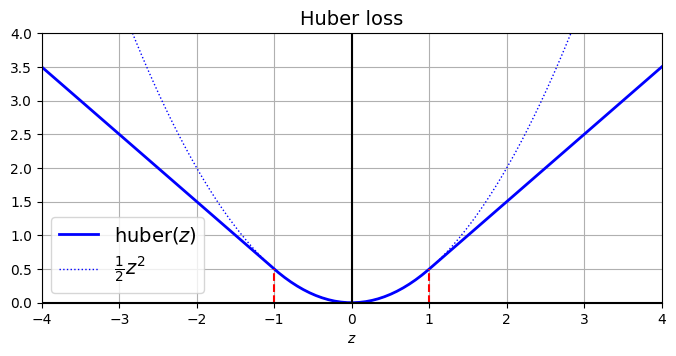

In [57]:
# 후버 손실

def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [58]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [59]:
history = model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.6134 - mae: 0.9750 - val_loss: 0.2772 - val_mae: 0.5705
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2149 - mae: 0.5085 - val_loss: 0.2374 - val_mae: 0.5180


In [60]:
# 사용자 정의 모델 저장 및 불러오기

model.save("my_model_with_a_custom_loss.h5")
rmodel = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})
history = rmodel.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


C:\Users\leedo\anaconda3\envs\hand_on_ml\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 3ms/step - loss: 0.2031 - mae: 0.4911 - val_loss: 0.1939 - val_mae: 0.4737
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1963 - mae: 0.4826 - val_loss: 0.2021 - val_mae: 0.4819


In [61]:
# 사용자 정의 모델 - 매개변수입력 가능

def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [62]:
history = model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.2307 - mae: 0.4951 - val_loss: 0.2270 - val_mae: 0.4793
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.2209 - mae: 0.4869 - val_loss: 0.2065 - val_mae: 0.4623


In [63]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")
rmodel = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": huber_fn})
history = rmodel.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.1927 - mae: 0.4771 - val_loss: 0.1833 - val_mae: 0.4575
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1895 - mae: 0.4716 - val_loss: 0.1806 - val_mae: 0.4618


In [64]:
# loss를 상속하여 모델 구현

class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
    
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [65]:
history = model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.7308 - mae: 0.9227 - val_loss: 0.3665 - val_mae: 0.5597
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2435 - mae: 0.5088 - val_loss: 0.2967 - val_mae: 0.5203


In [66]:
model.save("my_model_with_a_custom_loss_class.h5")
lmodel = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})
history = lmodel.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2310 - mae: 0.4983 - val_loss: 0.2314 - val_mae: 0.4827
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2235 - mae: 0.4909 - val_loss: 0.2334 - val_mae: 0.4896


In [67]:
keras.backend.clear_session()

In [68]:
# 사용자 정의 활성화 함수
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

# 글로럿 초기화
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

# L1규제
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1, activation=my_softplus,
                          kernel_initializer=my_glorot_initializer,
                          kernel_regularizer=my_l1_regularizer,
                          kernel_constraint=my_positive_weights)
])

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [70]:
history = model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 3.2778 - mae: 0.8558 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 1.4993 - mae: 0.6658 - val_loss: inf - val_mae: inf


In [71]:
model.save("my_model_with_many_custom_parts")
lmodel = tf.keras.models.load_model(
    "my_model_with_many_custom_parts",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    }
)
history = lmodel.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

INFO:tensorflow:Assets written to: my_model_with_many_custom_parts\assets


INFO:tensorflow:Assets written to: my_model_with_many_custom_parts\assets
C:\Users\leedo\anaconda3\envs\hand_on_ml\Lib\site-packages\keras\src\initializers\__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(
C:\Users\leedo\anaconda3\envs\hand_on_ml\Lib\site-packages\keras\src\regularizers.py:426: UserWarning: The `keras.regularizers.serialize()` API should only be used for objects of type `keras.regularizers.Regularizer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(
C:\Users\leedo\anaconda3\envs\hand_on_ml\Lib\site-packages\keras\src\constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'function'>, which may l

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.9607 - mae: 0.5815 - val_loss: 1.8701 - val_mae: 0.5620
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.7335 - mae: 0.5409 - val_loss: 1.2224 - val_mae: 0.5259


In [72]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [73]:
keras.backend.clear_session()

In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [75]:
history = model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 1.7247 - mae: 0.9088 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6649 - mae: 0.5193 - val_loss: inf - val_mae: inf


In [76]:
keras.backend.clear_session()

손실과 지표에 같은 함수를 사용하더라도 다른 결과가 나올 수 있다.

왜냐하면 수학 식이 동일하더라도 연산은 동일한 순서대로 실행되지 않고 이로 인해 작은 차이가 발생하게 된다.

그 결과 부동 소수점 정밀도 오차로 인해 값이 달라질수 있다.

(손실) = 지표 * 샘플 가중치의 평균

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

sample_weight = np.random.rand(len(y_train))

history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.4911 - huber_fn: 0.9971
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1189 - huber_fn: 0.2414


In [78]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.4910583198070526, 0.5012792748582332)

### 스트리밍 지표

케라스에서는 훈련하는동안 각 배치에 대해 지표를 계산하고 평균을 기록한다.

이는 대부분 문제가 없지만 정밀도를 계산할 때 전체 평균과 배치마다 평균의 합이 다를 가능성이 있다.

이를 해결하기 위해서 Precision클래스 객체를 사용하면 된다.

In [79]:
# TP = 4, FP = 1 -> 0.8

precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

# TP = 0, FP = 3 -> 0

precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

# total: TP = 4, FP = 4 -> 0.5

precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [80]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [81]:
precision.reset_states()

In [82]:
# 스트리밍 지표 - 전체 후버 손실 & 처리한 샘플 수 기록

class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) 
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros") # 후버 손실의 합
        self.count = self.add_weight("count", initializer="zeros") # 처리한 샘플의 수
        
    def update_state(self, y_true, y_pred, sample_weight=None): 
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
        
    def result(self): # 최종 결과
        return self.total / self.count
    
    def get_config(self): #threshfold 저장
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [83]:
m = HuberMetric(2.)

# total = 2 * |2 - 10| - 2²/2 = 14
# count = 1
m(tf.constant([[2.]]), tf.constant([[10.]])) 

# total = total + (2 * |0 - 1|² - 2² / 2) + (2 * |5 - 9.25| - 2² / 2) = 14 + 0 + 7 = 21
# count = count + 2 = 3
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

# result = total / count = 21 / 3 = 7
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [84]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [85]:
keras.backend.clear_session()

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [87]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.7480 - huber_metric: 0.7480
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2541 - huber_metric: 0.2541


In [88]:
model.save("my_model_with_a_custom_metric.h5")
model = keras.models.load_model("my_model_with_a_custom_metric.h5",
                                custom_objects={"huber_fn": create_huber(2.0),
                                                "HuberMetric": HuberMetric})
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2


C:\Users\leedo\anaconda3\envs\hand_on_ml\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 1ms/step - loss: 0.2413 - huber_metric: 0.2413
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2322 - huber_metric: 0.2322


In [89]:
'''
 tf.keras가 model.metrics의 0번째 위치에 지표를 추가한다.
 따라서 HuberMetric에 접근하려면 model.metrics[0] 대신 model.metrics[-1]를 사용해야 한다.
'''
model.metrics[-1].threshold

2.0

In [90]:
keras.backend.clear_session()

In [91]:
# 사용자 정의 층
# 회귀 모델이 예측할 값이 양수이고, 스케일이 매우 다른 경우 출력층에 지수 함수를 추가하면 유용할 수 있다:

exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.1804 - val_loss: 0.4180
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4424 - val_loss: 0.3895
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4144 - val_loss: 0.3752
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4020 - val_loss: 0.3758
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.3746


0.37463727593421936

In [92]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
    
    # 가중치마다 층의 변수 만들어줌
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end
    
    # 입력을 받아 커널을 곱하고 편향을 더함
    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)
    
    # 층의 크기 반환
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [93]:
keras.backend.clear_session()

In [94]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])
model.compile(loss="mse", optimizer="nadam")

In [95]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.6409 - val_loss: 0.9399
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.5015


0.5014545917510986

In [96]:
model.save("my_model_with_a_custom_layer.h5")
lmodel = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})
history = lmodel.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4686 - val_loss: 0.4506
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.4276 - val_loss: 0.4263


In [97]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape)
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [98]:
# 절반씩 데이터 분할

def split_data(data):
    columns_count = data.shape[-1]
    half = columns_count // 2
    return data[:, :half], data[:, half:]

X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

# 분할된 데이터 크기 출력
outputs1, outputs2 = MyMultiLayer()((X_train_scaled_A, X_train_scaled_B))

X1.shape:  (11610, 4)  X2.shape:  (11610, 4)


In [99]:
keras.backend.clear_session()

# 데이터 분할 후 학습하고 병합

input_A = keras.layers.Input(shape=X_train_scaled_A.shape[-1])
input_B = keras.layers.Input(shape=X_train_scaled_B.shape[-1])
hidden_A, hidden_B = MyMultiLayer()((input_A, input_B))
hidden_A = keras.layers.Dense(30, activation='selu')(hidden_A)
hidden_B = keras.layers.Dense(30, activation='selu')(hidden_B)
concat = keras.layers.Concatenate()((hidden_A, hidden_B))
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss='mse', optimizer='nadam')

X1.shape:  (None, 4)  X2.shape:  (None, 4)


In [100]:
history = model.fit((X_train_scaled_A, X_train_scaled_B), y_train, epochs=2,
          validation_data=((X_valid_scaled_A, X_valid_scaled_B), y_valid))

Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 [==============================] - 2s 2ms/step - loss: 2.3073 - val_loss: 9.8343
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 1.1720 - val_loss: 2.4047


Dropout이나 Batch Normalization을 사용하는 층의 경우 훈련할때는 데이터를 변형하여 학습을 해야하지만 테스트 할때는 이런 변형을 하면 안된다.

따라서 훈련과 테스트에서 다르게 동작하는 층을 만들어야한다.

아래는 훈련할때는 call()메서드의 training 매개변수를 받아 가우스 잡음을 추가하고 테스트 할때는 아무것도 하지 않는 층이다.

In [101]:
# 훈련과 테스트에서 다르게 동작

class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [102]:
keras.backend.clear_session()

model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.0),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="nadam")

In [103]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.2744 - val_loss: 1.1683
Epoch 2/2
162/162 [==============================] - 0s 991us/step - loss: 0.7902


0.7902020215988159

### 사용자 정의 모델 - Residual

ResidualBlock은 두 개의 완전 연결층과 스킵 연결로 구성되어있는데, 완전연결된 첫 번째 층을 통과한 데이터를 입력 받는다

이러한 ResidualBlock을 3번 더 반복하고 두 번째 ResidualBlock을 통과한 다음 출력층으로 결과를 전달하는 모델이다.

In [104]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [105]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        
        # 모델 재사용
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [106]:
keras.backend.clear_session()
X_new_scaled = X_test_scaled

model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 2s 2ms/step - loss: 56.0767
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 6.7545
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 2.4380
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.9473
Epoch 5/5
162/162 [==============================] - 0s 1ms/step


In [107]:
model.save("my_custom_model.ckpt")
model = keras.models.load_model("my_custom_model.ckpt")
history = model.fit(X_train_scaled, y_train, epochs=5)

INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


Epoch 1/5
363/363 [==============================] - 3s 2ms/step - loss: 3.9371
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5746
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 1.0505
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 1.0916
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 8.6866


대신 시퀀셜 API를 사용하는 모델을 정의할 수 있습니다:

In [108]:
keras.backend.clear_session()

block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="nadam")

In [109]:
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 2s 2ms/step - loss: 1.7877
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5639
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4010
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4755
Epoch 5/5
162/162 [==============================] - 0s 1ms/step


In [110]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")
                       for _ in range(5)]
        self.out = tf.keras.layers.Dense(output_dim)
        self.reconstruction_mean = tf.keras.metrics.Mean(
            name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)
        self.built = True  # WORKAROUND for super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

In [111]:
keras.backend.clear_session()

model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2
363/363 [==============================] - 3s 2ms/step - loss: 1.1080 - reconstruction_error: 0.9610
Epoch 2/2
162/162 [==============================] - 0s 1ms/step


In [112]:
# 미분 연산

def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

w1, w2 = 5, 3
eps = 1e-6
print((f(w1 + eps, w2) - f(w1, w2)) / eps)
print((f(w1, w2 + eps) - f(w1, w2)) / eps)

36.000003007075065
10.000000003174137


일반적인 미분을 사용하게되면 파라미터마다 적어도 한 번씩 함수를 호출해서 계산해야한다.

따라서 대규모 신경망의 경우 파라미터마다 함수를 호출하는것은 시간이 많이 걸려 어렵다.

따라서 자동 미분을 통해 한 번만 계산하여 속도를 높일 수 있다.

In [113]:
# 자동 미분

w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [114]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


In [115]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
print(dz_dw1, dz_dw2)
del tape

tf.Tensor(36.0, shape=(), dtype=float32) tf.Tensor(10.0, shape=(), dtype=float32)


gradient() 메서드를 호출한 뒤에 자동으로 테이프가 즉시 지워진다.

따라서 연속으로 호출하면 오류가 발생한다.

이를 막기 위해서 persistent로 지속 가능한 상태로 만들고 사용이 끝나면 del로 지워주면 된다.

In [116]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [117]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.) # 6w1+2(w2+2), 2w1
    z2 = f(w1, w2 + 5.) # 6w1+2(w2+5), 2w1
    z3 = f(w1, w2 + 7.) # 6w1+2(w2+7), 2w1
    
# z1, z2, z3 각각 그레디언트 계산후 더한값 출력
tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [118]:
# 2계도함수

with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
    print(jacobians)
hessians = [hessian_tape.gradient(jacobian, [w1, w2]) for jacobian in jacobians]
print(hessians)
del hessian_tape

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>, <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]
[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0>], [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]


In [119]:
# 역전파 차단

def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

숫자가 너무 큰 값이 입력되면 NaN로 반환이 된다.

왜냐하면 너무 큰 값은 값을 계산할 때 부동소수점 정밀도 오류로 무한대에서 무한대를 나누는 계산을 하게 된다.

따라서 그레디언트를 계산하는게 수치적으로 불안정하기 때문에 오류값이 나온다.

그래도 계산을 하려면 @tf.custom_gradient 데코레이터로 사용자 지정 그레디언트 함수를 정의하여 그레디언트를 계산할 때 안전한 함수를 사용하도록 만들어야한다.

In [120]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [121]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [122]:
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [123]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

In [124]:
# 사용자 정의 훈련 반복

keras.backend.clear_session()

l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [125]:
# 샘플 배치 랜덤 추출

def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [126]:
# 현재 스텝/전체 스텝, 평균 손실 출력

def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " , ".join(["{}: {:.4f}".format(m.name, m.result()) for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} , ".format(iteration, total) + metrics, end=end)

In [127]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 , loss: 0.0900 , mean_square: 858.5000


In [128]:
# 진행 바

def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

In [129]:
def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)
    
mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


In [130]:
keras.backend.clear_session()

n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [131]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610 [==============================] - mean: 1.5783 - mean_absolute_error: 0.60574
Epoch 2/5
11610/11610 [==============================] - mean: 0.7489 - mean_absolute_error: 0.5307
Epoch 3/5
11610/11610 [==============================] - mean: 0.6998 - mean_absolute_error: 0.5253
Epoch 4/5
11610/11610 [==============================] - mean: 0.6642 - mean_absolute_error: 0.5124
Epoch 5/5
11610/11610 [==============================] - mean: 0.6451 - mean_absolute_error: 0.5044


In [132]:
from tqdm.notebook import trange
from collections import OrderedDict

with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train_scaled, y_train)
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                
                # 모델 가중치 제한
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))                    
                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()


All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/362 [00:00<?, ?it/s]

In [133]:
# 텐서플로 함수

def cube(x):
    return x ** 3
cube(2)

8

In [134]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [135]:
tf_cube = tf.function(cube)
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [136]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

get_concrete_function는 구체적인 함수를 얻는다.

구체적인 함수를 사용하면 그래프 모드에서 텐서플로우 함수를 실행할 수 있으며, 필요한 경우 그래프를 저장하거나 최적화할 수 있다.

In [137]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [138]:
# 구체적인 함수로부터 그래프 얻기
concrete_function.graph

# 그래프 내의 연산 목록 확인
ops = concrete_function.graph.get_operations()

pow_op = ops[2]
print(list(pow_op.inputs))
print(pow_op.outputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>, <tf.Tensor 'pow/y:0' shape=() dtype=float32>]
[<tf.Tensor 'pow:0' shape=() dtype=float32>]


tf.function 데코레이터는 텐서플로 코드의 성능, 효율성 및 확장성을 향상시키는데 도움을 준다.

In [139]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [140]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]])) 
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) 
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) 

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)
print: Tensor("x:0", shape=(3, 2), dtype=float32)


텐서플로 함수는 호출에 사요되는 입력 크기와 데이터 타입에 맞춰 새로운 그래프를 매번 생성한다.

만일 동일한 크기와 타입을 가지고 있는것을 호출하면 동일한 그래프가 재사용된다.

하지만 다른 크기나 타입을 가지고 있는것을 호출하면 해당 크기와 타입에 맞는 새로운 그래프가 생성된다.

In [141]:
# 특정 상황 지정 함수

@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    return images[:, ::2, ::2]

In [142]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1) 
preprocessed_images = shrink(img_batch_2)

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [143]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  
except TypeError as ex:
    print(ex)

Binding inputs to tf.function failed due to `Can not cast TensorSpec(shape=(2, 2, 2), dtype=tf.float32, name=None) to TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)`. Received args: (<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[0.20581126, 0.39744473],
        [0.37670124, 0.7256851 ]],

       [[0.14545166, 0.5825877 ],
        [0.2706505 , 0.37260306]]], dtype=float32)>,) and kwargs: {} for signature: (images: TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)).


### 오토그래프

오토그래프는 텐서플로우에서 제공하는 동적 그래프와 정적 그래프 간의 전환을 자동으로 처리해주는 기능이다.

이는 Python 함수 내에서 반복문이나 조건문과 같은 제어 흐름을 정적 그래프로 변환한다.

그리고 텐서플로우 연산을 자동으로 사용 가능한 형태로 변환한다.

결과적으로 사용자는 코드를 즉시 실행 모드에서 개발 및 디버깅하면서, 필요한 경우 효율적인 정적 그래프 모드로 전환하여 모델을 최적화할 수 있다.

In [144]:
# for문 반복
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [145]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [146]:
# while문 반복

@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [147]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [153]:
# 외부 변수 이용

counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)
increment(counter)
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [154]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg

[name: "counter"
type: DT_RESOURCE
]

In [158]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [159]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg

[name: "assignaddvariableop_resource"
type: DT_RESOURCE
]

In [160]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

tf.autograph.to_code는 오토그래프에 의해 생성된 그래프나 코드를 읽고, 해당 코드를 원래 파이썬 코드로 다시 변환하는 데 사용된다.

이 함수를 사용하면 텐서플로우 오토그래프에 의해 변환된 코드를 이해하고, 디버깅하기 위해 그래프로부터 파이썬 코드로 변환할 수 있다.

In [163]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

print(tf.autograph.to_code(add_10.python_function))

def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            x, = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [166]:
# 사용자정의 손실 함수
def my_mse(y_true, y_pred):
    print("my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

# 사용자정의 지표 함수
def my_mae(y_true, y_pred):
    print("my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

# 사용자 정의 층
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super().build(input_shape)

    def call(self, X):
        print("MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)
    
# 사용자 정의 모델
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

In [167]:
model = MyModel()
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
MyModel.call()
MyDense.call()
MyDense.call()
MyDense.call()
my_mse()
my_mae()
MyModel.call()
MyDense.call()
MyDense.call()
MyDense.call()
my_mse()
my_mae()
342/363 [===========================>..] - ETA: 0s - loss: 1.5207 - my_mae: 0.8607MyModel.call()
MyDense.call()
MyDense.call()
MyDense.call()
my_mse()
my_mae()
363/363 [==============================] - 2s 3ms/step - loss: 1.4631 - my_mae: 0.8401 - val_loss: 0.4632 - val_my_mae: 0.4878
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.4229 - my_mae: 0.4659


[0.42292115092277527, 0.465878427028656]

일반적으로 텐서플로우에서는 모델은 정적 그래프로 동작하며, 그래프가 한 번 정의되면 그래프의 구조나 연산을 변경할 수 없다.

하지만 dynamic=True로 만들면 모델이 동적 그래프로 동작하도록 설정된다.

동적 그래프에서는 모델의 구조나 연산을 실행 중에 변경할 수 있으므로 모델을 더 유연하게 다룰 수 있다.

다만 너무 출력이 많이 되는것을 대비해 작은 데이터셋을 사용하였다.

In [168]:
model = MyModel(dynamic=True)
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

MyModel.call()
MyDense.call()
MyDense.call()
MyDense.call()
my_mse()
my_mae()
MyModel.call()
MyDense.call()
MyDense.call()
MyDense.call()
my_mse()
my_mae()
MyModel.call()
MyDense.call()
MyDense.call()
MyDense.call()
my_mse()
my_mae()
MyModel.call()
MyDense.call()
MyDense.call()
MyDense.call()
my_mse()
my_mae()
MyModel.call()
MyDense.call()
MyDense.call()
MyDense.call()
my_mse()
my_mae()
MyModel.call()
MyDense.call()
MyDense.call()
MyDense.call()
my_mse()
my_mae()


[5.619383335113525, 2.0607473850250244]